<a href="https://colab.research.google.com/github/SimonT2003/MAT421/blob/main/HW_B_17_1%2C17_2%2C17_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolation in Python

## Section 17.1 - Interpolation Problem Statement

Assume we have a data set consisting of independent data values, $x_i$, and dependent data values, $y_i$, where $i=1,2,3,...,n$.

We would like to find an estimation function $ŷ(x)$ such that $ŷ(x_i)=y_i$ for every point in our data set. This means the estimation function goes through our data points.

Given a new $x*$, we can **interpolate** its function value using $ŷ(x*)$. In this context, $ŷ(x)$ is called an **interpolation function**.

Unlike regression, interpolation does not require the user to have an underlying model for the data, especially when there are many reliable data points. However, the processes that underly the data must still inform the user about the quality of the interpolation. For example, our data may consist of $(x,y)$ coordinates of a car over time. Since motion is restricted to the maneuvering physics of the car, we can expect that the points between the $(x,y)$ coordinates in our set will be “smooth” rather than jagged.

<ipython-input-1-344d5287fcbf>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


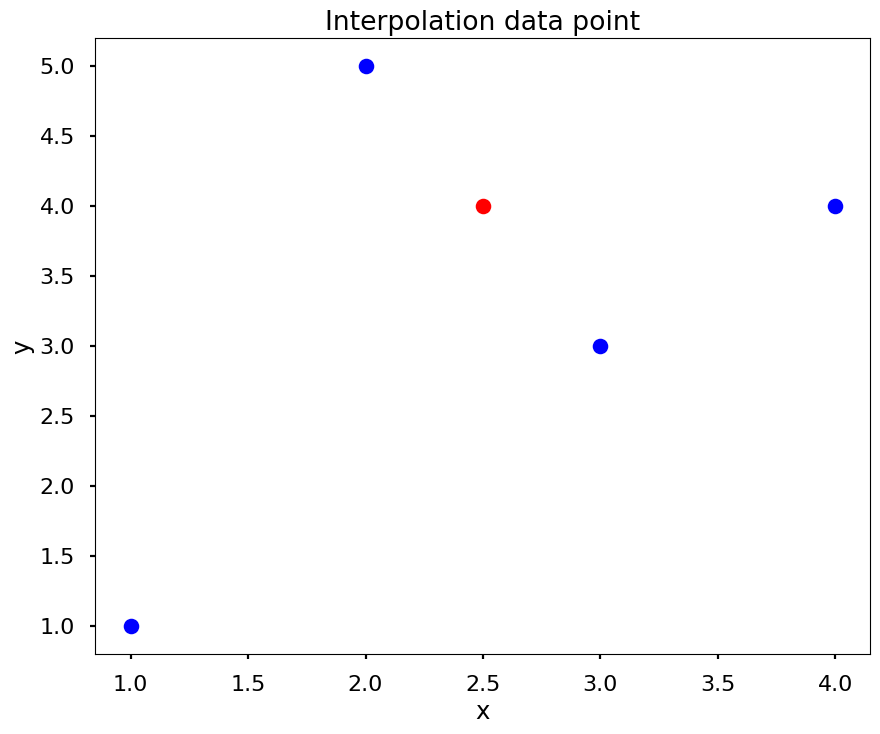

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

x = [1,2,3,4]
y = [1,5,3,4]
plt.figure(figsize = (10,8))
plt.plot(x,y,'bo', 2.5,4,'ro')
plt.title('Interpolation data point')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Section 17.2 - Linear Interpolation

In **linear interpolation**, the estimated point is assumed to lie on the line joining the nearest points to the left and right.

Assume, without loss of generality, that the $x$-data points are in ascending order; that is, $x_i<x_{i+1}$, and let $x$ be a point such that $x_i<x<x_{i+1}$. Then the linear interpolation at $x$ is $ŷ(x)=y_i+\frac{(y_{i+1}-y_i)(x-x_i)}{(x_{i+1}-x_i)}$ .

**TRY IT!** Find the linear interpolation at $x=1.5$ based on the data $x=[0,1,2], y=[1,2,3]$ . Verify the result using scipy’s function interp1d.

Since $1<x<2$, we use the second and third data points to compute the linear interpolation. Plugging in the corresponding values gives $ŷ(x)=y_i+\frac{(y_{i+1}-y_i)(x-x_i)}{(x_{i+1}-x_i)}=3+\frac{(2-3)(1.5-1)}{(2-1)}=2.5$

In [2]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

<ipython-input-2-d91ac8cf503e>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [3]:
x = [0, 1, 2]
y = [1, 3, 2]

f = interp1d(x, y)
y_hat = f(1.5)
print(y_hat)

2.5


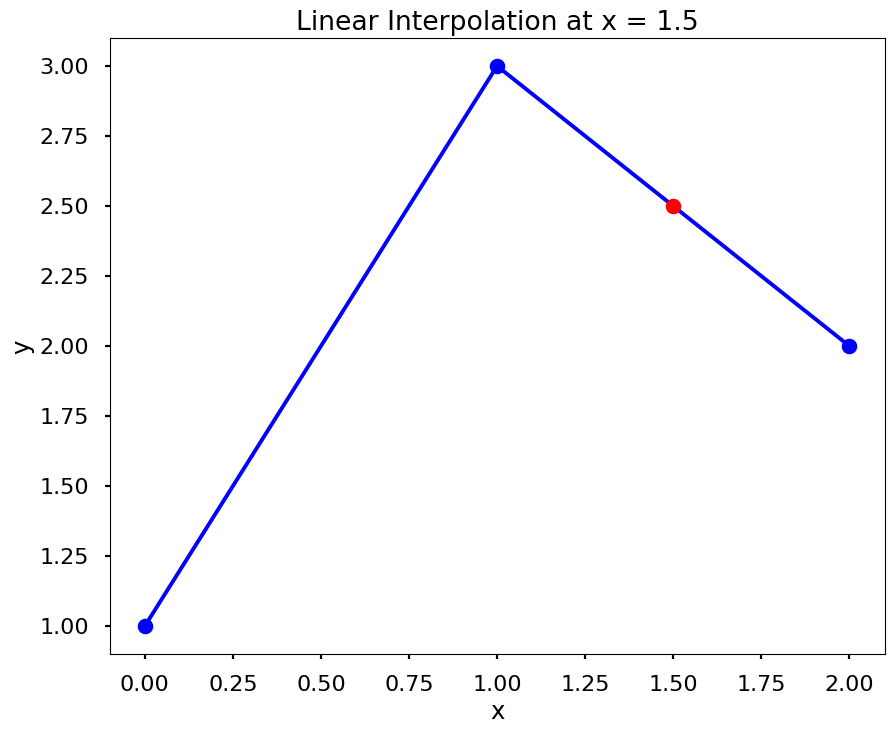

In [4]:
plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(1.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Section 17.3 - Cubic Spline Interpolation

In cubic spline interpolation, the interpolating function is a set of piecewise cubic functions.

Following is the cubic spline interpolation of the data set $x = [0, 2, 4, 6]$ and $y = [1, 7, 6, 4]$ for $0 ≤ x ≤ 7$.

<ipython-input-5-a0ae63e2ef8d>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


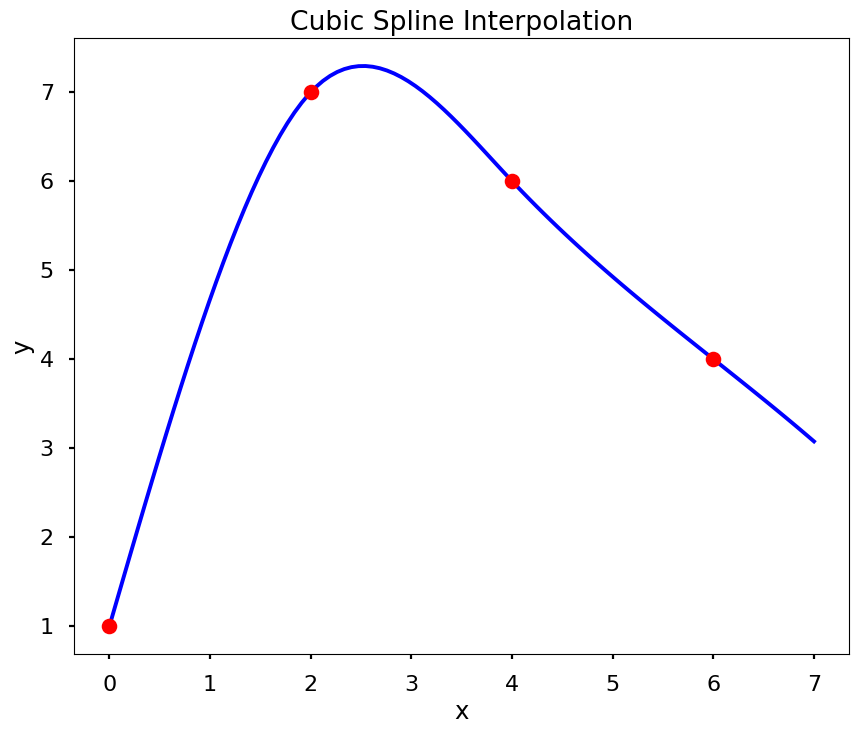

In [5]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

x = [0, 2, 4, 6]
y = [1, 7, 6, 4]

f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 7, 100)
y_new = f(x_new)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## End of Module B